In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## plotly.offline.plot()和plotly.offline.iplot()两种方法，前者是以离线的方式在当前工作目录下生成html格式的图像文件，并自动打开；
## 后者是在jupyter notebook中专用的方法，即将生成的图形嵌入到ipynb文件中，本文即采用后面一种方式
import plotly.offline as py
## 在jupyter notebook中使用plotly.offline.iplot()时，需要在之前运行plotly.offline.init_notebook_mode()以完成绘图代码的初始化
py.init_notebook_mode(connected = True)  

color = sns.color_palette()  ## seaborn 调色盘color_palette()

import plotly.graph_objs as go   ## graph_objs相当于matplotlib，

import plotly.tools as tls

%matplotlib inline

In [2]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

#  查看数据

In [3]:
## 导入数据
df_train = pd.read_csv('Skyserver_12_30_2019 4_49_58 PM.csv')


In [4]:
df_train.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [5]:
df_train.shape

(100000, 18)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [7]:
df_train.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.512888,25.052056,18.637915,17.407128,16.881676,16.625534,16.467087,3978.727640,301.0,3.274010,187.243080,2.913905e+18,0.170621,2587.984270,53913.908690,341.699080
std,7.264931e+12,78.039070,20.567259,0.832284,0.985921,1.133337,1.209532,1.281788,1691.498597,0.0,1.621208,141.037298,2.488872e+18,0.437571,2210.547391,1547.244489,217.068614
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.356526,6.770380,18.212902,16.852982,16.196608,15.865275,15.619960,2826.000000,301.0,2.000000,85.000000,1.335426e+18,0.000001,1186.000000,52733.000000,160.000000
50%,1.237662e+18,180.411688,23.918611,18.873250,17.515860,16.890640,16.599885,16.428385,3900.000000,301.0,3.000000,153.000000,2.354330e+18,0.045997,2091.000000,53726.000000,328.000000
75%,1.237667e+18,224.369107,40.344539,19.273302,18.056060,17.585750,17.344912,17.234625,5061.000000,301.0,5.000000,249.000000,3.276384e+18,0.095429,2910.000000,54585.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [8]:
df_train['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

# 删除不需要的数据

run/rerun 图像处理方式

camcol  摄像机列

field 场？

objid 对象标识符

specobjid  光谱标识符

fiberid  光纤号


In [9]:
df_train.drop(['run', 'rerun', 'camcol', 'field', 'objid', 'specobjid', 
              'fiberid'], axis = 1, inplace = True)

df_train.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,STAR,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,STAR,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210,2123,53793


In [10]:
df_train.isnull().sum()  # 显示存在缺失值的列

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

# 数据可视化

C:\Users\Administrator\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='class', ylabel='count'>

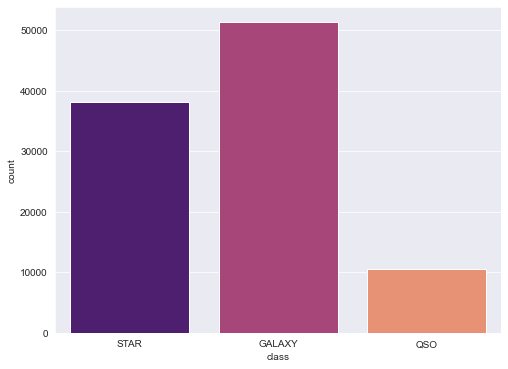

In [11]:
sns.set_style('darkgrid')

plt.figure(figsize = (8,6))

sns.countplot(df_train['class'], palette = 'magma')  #  以bar的形式展示每个类别的数量 palette 调色板

## pairplot:pair成对  用来展现变量两两之间的关系，线性、非线性、相关等等

hue ：针对某一字段进行分类

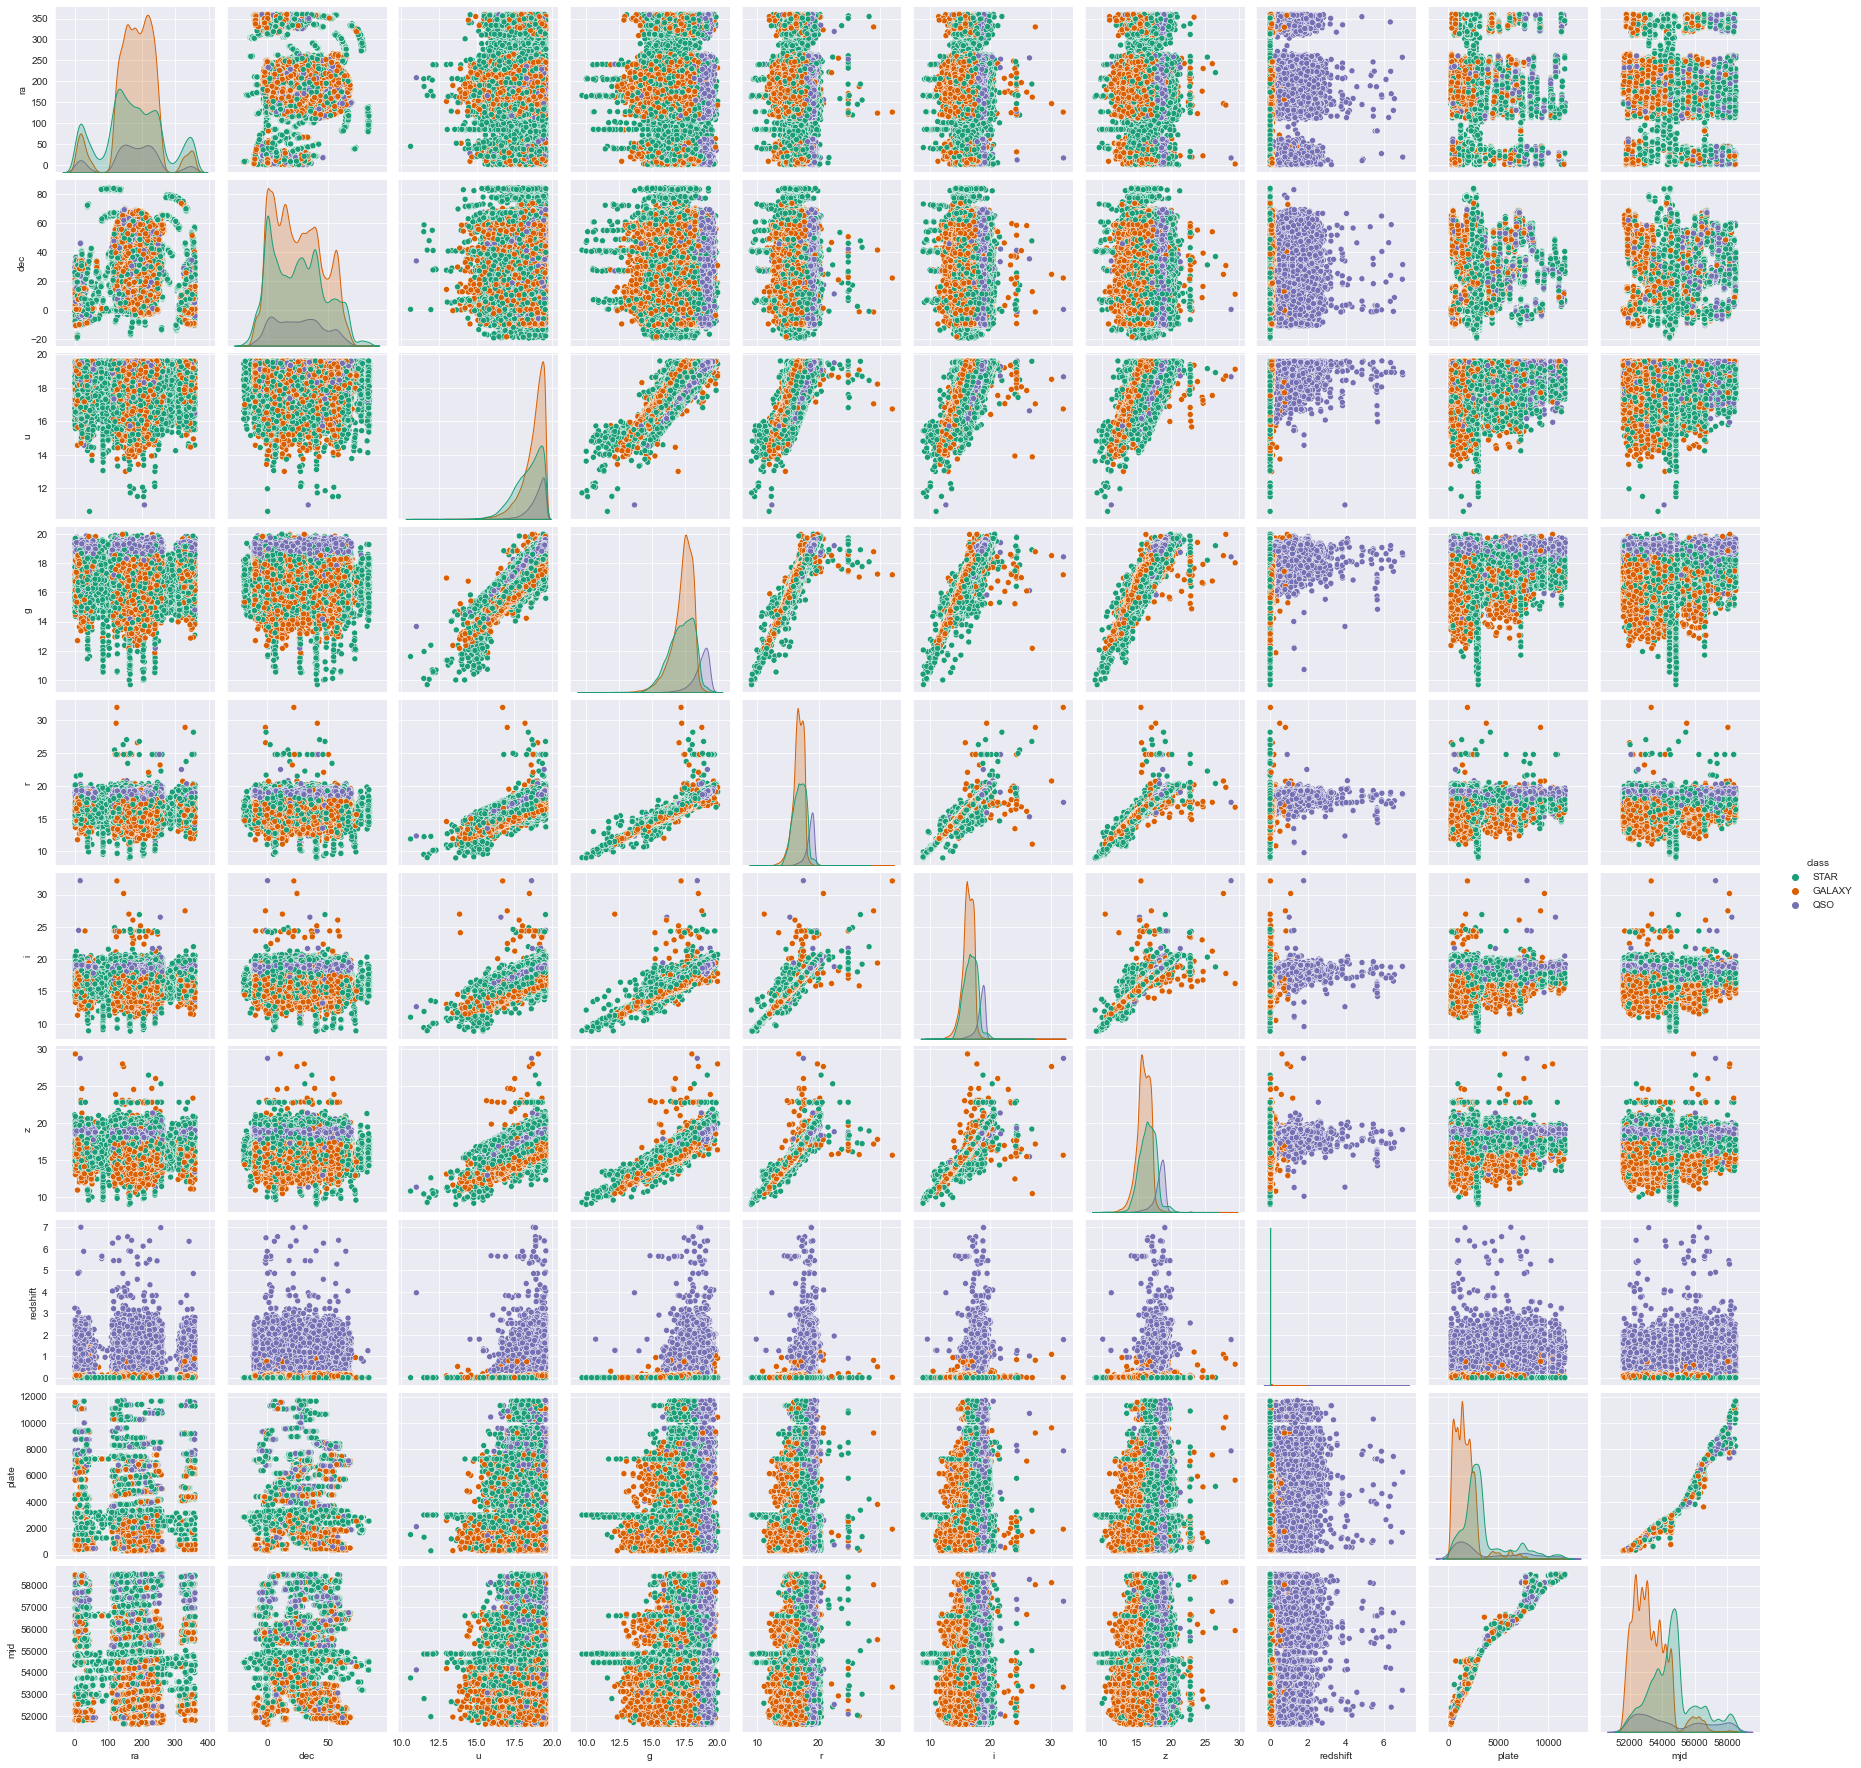

In [12]:
sns.pairplot(data = df_train, palette = 'Dark2', hue = 'class')

## 箱型图 seaborn.boxplot

箱形图是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。矩形框显示数据集的上下四分位数，而矩形框中延伸出的线段（触须）则用于显示其余数据的分布位置，剩下超过上下四分位间距的数据点则被视为“异常值”。

利用箱型图判断数据批的偏态和尾重 对于标准正态分布的样本，只有极少值为异常值。异常值越多说明尾部越重，自由度越小（即自由变动的量的个数）；而偏态表示偏离程度，异常值集中在较小值一侧，则分布呈左偏态；异常值集中在较大值一侧，则分布呈右偏态。

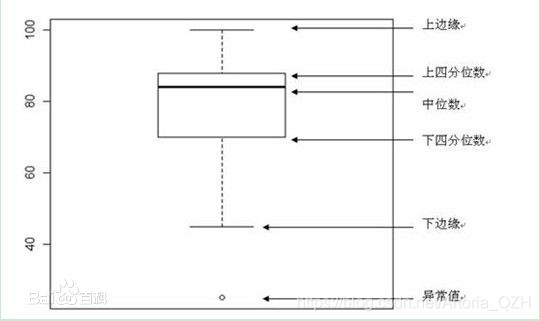

<AxesSubplot:xlabel='class', ylabel='mjd'>

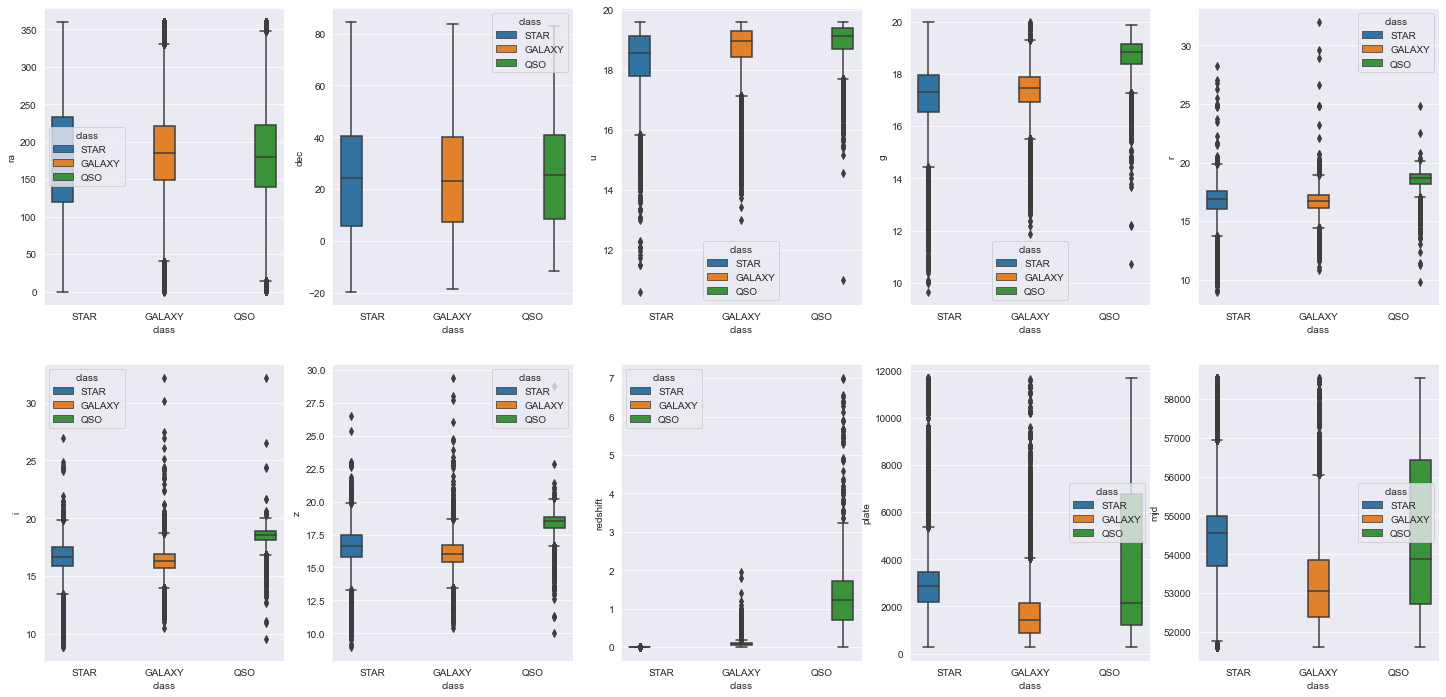

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows = 2, ncols = 5,figsize = (25,12))


sns.boxplot(ax = ax1, x = 'class', y = 'ra', hue = 'class', data = df_train)
sns.boxplot(ax = ax2, x = 'class', y = 'dec', hue = 'class', data = df_train)
sns.boxplot(ax = ax3, x = 'class', y = 'u', hue = 'class', data = df_train)
sns.boxplot(ax = ax4, x = 'class', y = 'g', hue = 'class', data = df_train)
sns.boxplot(ax = ax5, x = 'class', y = 'r', hue = 'class', data = df_train)
sns.boxplot(ax = ax6, x = 'class', y = 'i', hue = 'class', data = df_train)
sns.boxplot(ax = ax7, x = 'class', y = 'z', hue = 'class', data = df_train)
sns.boxplot(ax = ax8, x = 'class', y = 'redshift', hue = 'class', data = df_train)
sns.boxplot(ax = ax9, x = 'class', y = 'plate', hue = 'class', data = df_train)
sns.boxplot(ax = ax10, x = 'class', y = 'mjd', hue = 'class', data = df_train)

In [14]:
df_train.var()  # 方差

ra          6.090096e+03
dec         4.230121e+02
u           6.926959e-01
g           9.720404e-01
r           1.284453e+00
i           1.462968e+00
z           1.642981e+00
redshift    1.914680e-01
plate       4.886520e+06
mjd         2.393966e+06
dtype: float64

## 热度图

<AxesSubplot:>

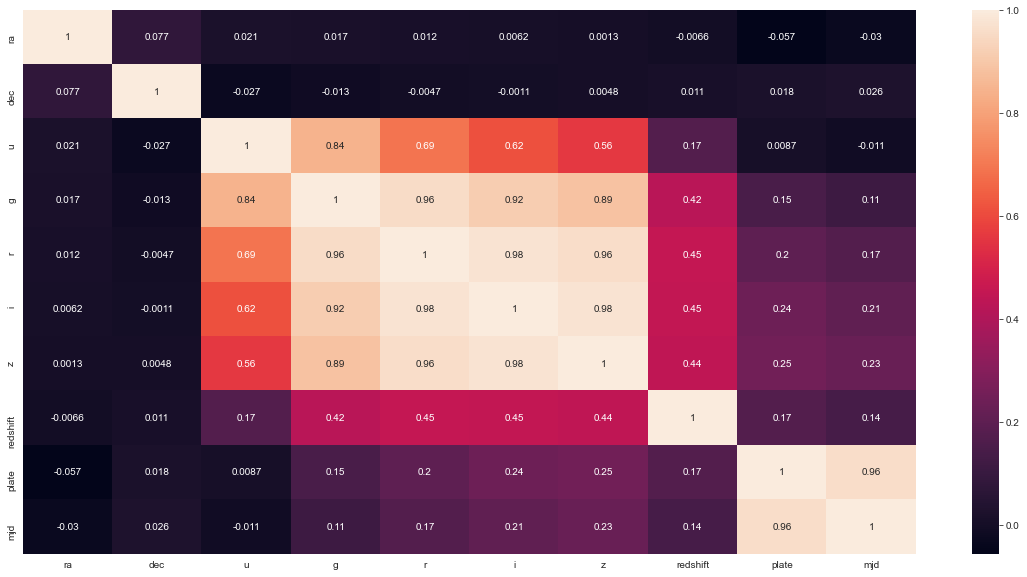

In [15]:
corr = df_train.corr()

plt.figure(figsize = (20,10))

sns.heatmap(corr, annot = True)

# 特征工程

## 把种类换成数字标识 1  2  3 

In [16]:
labels = {'STAR' :1, 'GALAXY': 2, 'QSO': 3}

df_train.replace({'class':labels}, inplace = True)

In [17]:
df_train.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1,0.000115,7255,56597
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1,-0.000093,8290,57364
2,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,1,0.000165,2861,54583
3,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,2,0.058155,2002,53471
4,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,2,0.072210,2123,53793


 ## 取出特征 X 和标签 y

In [18]:
X = df_train.drop('class', axis = 1).values  # 取出 df_train 中除了 class 列的所有数值  axis=1 删除该列每一行
y = df_train['class'].values  # 取出 df_train 中 class 列的所有数值

## 拆分训练集和测试集

sklearn.model_selection.train_test_split()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x: 待划分样本数据,   y: 待划分样本数据的结果（标签）,

test_size：测试数据占样本数据的比例，若整数则样本数量,

random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

## 去除平均值和缩放  

scikit-learn中RobustScaler,  对异常值鲁棒的统计信息来缩放特征.

数据集的标准化是许多机器学习估计器的常见需求。这通常是通过去除平均值和缩放到单位方差来实现的。然而，异常值往往会对样本均值/方差产生负面影响。在这种情况下，中位数和四分位范围通常会给出更好的结果。

scikit-learn中RobustScaler的计算方法如下：

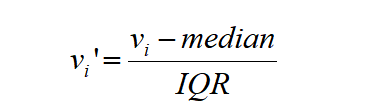

得到的数据是以0为均值，1为方差的正态分布，但这种方法改变了原始数据的结构，因此不适宜用于对稀疏矩阵做数据预处理。

另： x'=(x-min)/(max-min),min和max是x所在列的最小值和最大值。此方法得到的数据会完全落入[0,1]区间内（z-score没有类似区间），而且能使数据归一化落到一定的区间内，同时保留原始数据的结构

In [21]:
robust = RobustScaler()
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

#  逻辑回归

线性回归（Linear Regression）通常是处理因变量是连续变量的问题，如果因变量是定性变量，线性回归模型就不再适用了，需采用逻辑回归模型解决

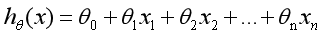


逻辑回归（Logistic Regression）是用于处理因变量为分类变量的回归问题，常见的是二分类或二项分布问题，也可以处理多分类问题，它实际上是属于一种分类方法。二分类问题的概率与自变量之间的关系图形往往是一个S型曲线，采用的Sigmoid函数实现。当x取值足够大的时候，可以看成0或1两类问题，大于0.5可以认为是1类问题，反之是0类问题，而刚好是0.5，则可以划分至0类或1类。

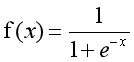

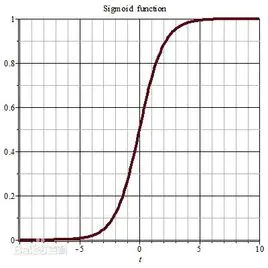

## 准确率
## 混淆矩阵
## 决定系数 $ R^{2} $

sklearn.linear_model.LinearRegression.score(self, X, y, sample_weight=None) ，返回对于以X为samples，以y为target的预测效果评分。其中： 

$$ R^{2} =（1-{ \frac{u}{v} }）$$

$$ u=((y_{true} - y_{pred}) ** 2).sum()  $$  $$   v=((y_{true} - y_{true}.mean()) ** 2).sum()$$

y_true和y_pred越接近，u/v的值越小,$ R^{2} $的值就越大

In [24]:
## 训练
lr = LogisticRegression(max_iter = 120)  # 逻辑回归 (Logistic Regression,LR)

lr.fit(X_train, y_train)  # 对训练集 X, y 进行训练。是对scipy.linalg.lstsq  最小二乘法 的封装

## 预测
y_pred = lr.predict(X_test)  #  sklearn.predict（） 是训练后返回预测结果，是标签值。
print("Classification Report: \n", classification_report(y_test, y_pred)) # sklearn.classification_report（y_test, y_pred）预测准确率

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))  # 混淆矩阵 sklearn.confusion_matrix（y_test, y_pred）


## 与真实标签比较预测准确率
# 训练集准确率 lr.score 最好的分数是1，并且可能是负值（因为模型可能会变得更加糟糕）
lr_train_acc = lr.score(X_train, y_train)   #  Scikit-learn中，LinearRegression().score，使用的是『决定系数』（ R^2 ）.
print('Training Score: ', lr_train_acc)  

# 测试集准确率
lr_test_acc = lr.score(X_test, y_test)
print('Testing Score: ', lr_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11460     0     3]
 [  251 15067    48]
 [    5   203  2963]]
Training Score:  0.9839428571428571
Testing Score:  0.983


C:\Users\Administrator\anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# 支持向量机

支持向量机(support vector machine)是一种分类算法，但是也可以做回归，根据输入的数据不同可做不同的模型（若输入标签为连续值则做回归，若输入标签为分类值则用SVC()做分类）。通过寻求结构化风险最小来提高学习机泛化能力，实现经验风险和置信范围的最小化，从而达到在统计样本量较少的情况下，亦能获得良好统计规律的目的。通俗来讲，它是一种二类分类模型，其基本模型定义为特征空间上的间隔最大的线性分类器，即支持向量机的学习策略便是间隔最大化，最终可转化为一个凸二次规划问题的求解。

主要用途：classification(分类)、regression(回归)、outliers detection(异常检测)

sklearn.svm.SVC() C-Support Vector Classification，是一种基于libsvm的支持向量机，由于其时间复杂度为O(n^2)，所以当样本数量超过两万时难以实现。

https://www.jianshu.com/p/a9f9954355b3?utm_campaign=maleskine&utm_content=note&utm_medium=seo_notes&utm_source=recommendation

In [23]:
## 训练
svc = SVC()  ## sklearn.svm.SVC()
svc.fit(X_train, y_train)

## 预测
print('Classification Report: \n', classification_report(y_test, y_pred))  # sklearn.classification_report（y_test, y_pred）预测准确率
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))  # 混淆矩阵 sklearn.confusion_matrix（y_test, y_pred）

## 准确率
svc_train_acc = svc.score(X_train, y_train)  # 返回给定训练集和对应标签的平均准确率
print('Training Score: ', svc_train_acc)

svc_test_acc = svc.score(X_test, y_test)
print('Testing Score: ', svc_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99     11463
           2       0.99      0.98      0.98     15366
           3       0.98      0.93      0.96      3171

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix: 
 [[11460     0     3]
 [  251 15067    48]
 [    5   203  2963]]
Training Score:  0.9834142857142857
Testing Score:  0.9821666666666666
